#### 이미지 필터링은 여러 수식을 이용하여 이미지를 이루고 있는 픽셀 행렬을 다른 값으로 바꾸어 이미지를 변형하는 것을 말한다.

## 임계처리

임계처리(thresholding)는 이미지 행렬에서 하나의 픽셀값을 사용자가 지정한 기준값(threshold)를 사용하여 이진화(binarization)하는 가장 단순한 필터다. OpenCV에서는 threshold라는 함수로 구현되어 있다. 인수는 다음과 같다.

+ threshold(src, thresh, maxval, type)
    + src : 그레이 스케일 이미지
    + thresh : 기준값
    + maxval : 기준값을 넘었을 때 적용할 최대값
    + type : 임계처리 유형
        + THRESH_BINARY : 기준값을 넘으면 최대값 아니면 0
        + THRESH_BINARY_INV : 기준값을 넘으면 0 아니면 최대값
        + THRESH_TRUNC : 기준값을 넘으면 기준값 아니면 최대값
        + THRESH_TOZERO : 기준값을 넘으면 원래값 아니면 0
        + THRESH_TOZERO_INV : 기준값을 넘으면 0 아니면 원래값

각 임계유형의 결과를 시각화하면 다음과 같다.

In [1]:
import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=20).get_name()

plt.rc('font', family=font_name)

import cv2

In [2]:
from skimage.data import coins

In [3]:
img = coins()
img.shape

(303, 384)

In [4]:
maxval = 255
thresh = maxval / 2

_, thresh1 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY) # 기준값 넘으면 최대값
_, thresh2 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY_INV) # 기준값 넘으면 0
_, thresh3 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TRUNC) # 기준값 넘으면 기준값, 안넘으면 최대값
_, thresh4 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TOZERO) # 기준값 넘으면 원래 값
_, thresh5 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TOZERO_INV) # 기준값 넘으면 0

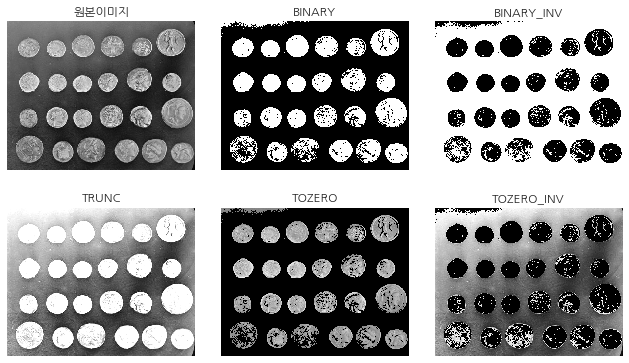

In [12]:
titles = ["원본이미지", "BINARY", "BINARY_INV", "TRUNC", "TOZERO", "TOZERO_INV"]
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(9, 5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap=mpl.cm.gray)
    plt.axis("off")
    plt.title(titles[i])
    
plt.tight_layout(pad=0.7, h_pad=3.0)
plt.show()    

## 적응임계처리

임계처리의 경우는 이미지 전체에 하나의 기준값을 적용한다. 

#### 적응임계처리는 일정한 영역 내의 이웃한 픽셀들의 값들을 이용하여 해당 영역에 적용할 기준값을 자체적으로 계산한다. 

OpenCV에서는 adaptiveThreshold 함수로 구현되어 있다.

+ adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)
    + src : 그레이스케일 이미지
    + maxValue – 기준값을 넘었을 때 적용할 값
    + adaptiveMethod : 영역 내에서 기준값을 계산하는 방법.
        + ADAPTIVE_THRESH_MEAN_C: 영역 내의 평균값에 C를 뺀 값을 기준값으로 사용
        + ADAPTIVE_THRESH_GAUSSIAN_C: 영역에 추후 설명할 가우시안 블러를 적용한 후 C를 뺀 값을 기준값으로 사용
    + thresholdType : 임계처리 유형
        + THRESH_BINARY
        + THRESH_BINARY_INV
    + blockSize : 임계처리를 적용할 영역의 크기
    + C : 평균이나 가중평균에서 차감할 값

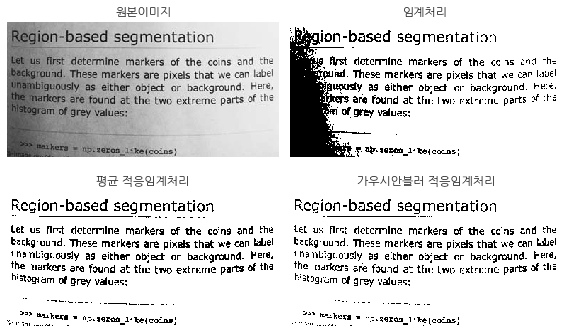

In [17]:
from skimage.data import page

img = page()

maxval = 255
thresh = 126

ret, th1 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)

k = 15
C = 20

th2 = cv2.adaptiveThreshold(img, maxval, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, k, C)
th3 = cv2.adaptiveThreshold(img, maxval, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, k, C)

images = [img, th1, th2, th3]
titles = ['원본이미지', "임계처리", "평균 적응임계처리", "가우시안블러 적응임계처리"]

plt.figure(figsize=(8, 5))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.axis("off")
    
plt.tight_layout()
plt.show()

## 이미지 필터링

이미지 필터링(image filtering)은 필터(filter) 또는 커널(kernel) 또는 윈도우(window)라고 하는 정방행렬을 정의하고 이 커널을 이동시키면서 같은 이미지 영역과 곱하여 그 결과값을 이미지의 해당 위치의 값으로 하는 새로운 이미지를 만드는 연산이다. 기호  ⊗ 로 표기한다.

원본 이미지의  (𝑥,𝑦)  위치의 명도를  𝑓(𝑥,𝑦) , 필터 이미지를  ℎ(𝑥,𝑦) , 필터링된 결과를  𝑔(𝑥,𝑦) 라고 하면 수식으로 다음과 같다.

$$f \otimes h = \sum_{u=-K/2}^{K} \sum_{v=-K/2}^{K} f(x + u, y + v) \cdot h(u, v)$$

이 식에서  𝐾 는 필터 크기의 절반을 뜻한다. 예를 들어  3×3  크기의 필터에서는  𝐾=1 이다. 위 식을 줄여서 다음과 같이 나타내기도 한다.  𝑊 S는 윈도우 영역을 뜻한다.

$$f \otimes h = \sum_{W} f(x + u, y + v) \cdot h(u, v)$$

#### 위 식에서 필터를 좌우 상하로 뒤집으면 콘볼루션(convolution)이라고 한다. 기호  ∗ 로 표기한다.

$$f * h = f \otimes \tilde{h} = \sum_{W} f(x - u, y - v) \cdot \tilde{h}(u, v)$$

$$\tilde{h}(u, v) = h(-u, -v)$$

[그림] 윈도우 연산 : https://datascienceschool.net/upfiles/0742fffa9e614cd78a8cba4ad08f0bc7.jpeg

openCV에서는 filter2D 함수를 사용한다

filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])

+ src: 이미지
+ ddepth: 이미지 깊이(자료형 크기). -1이면 입력과 동일
+ kernel: 커널 행렬

다음 코드는 평균을 구하는 커널 적용한 예다. 커널 크기가 커지면서 이미지가 점점 더 흐려지는 것을 볼 수 있다.



In [18]:
import cv2
from skimage.data import astronaut

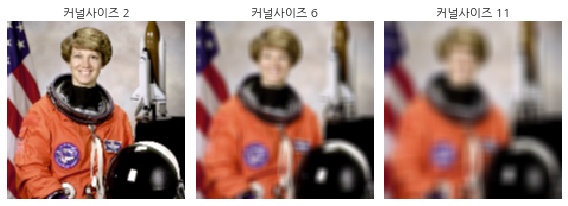

In [19]:
img = astronaut()
img = cv2.resize(img, dsize=(150, 150))

plt.figure(figsize=(8, 3))
for i, k in enumerate([2, 6, 11]):
    kernel = np.ones((k, k)) / k**2
    filtering = cv2.filter2D(img, -1, kernel)
    plt.subplot(1, 3, i+1)
    plt.imshow(filtering)
    plt.title("커널사이즈 {}".format(k))
    plt.axis("off")
    
plt.tight_layout()
plt.show()

#### 커널사이즈가 클수록 블러 효과가 커진다.